In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
(train_data,train_targets),(test_data,test_targets)=keras.datasets.boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
data = pd.read_csv("/house_price.csv")
print(data.head())


   Area (sqft)  Bedrooms  Bathrooms  Age     Price
0         1200         2          3    5    450000
1         1500         3          2    8    520000
2          800         1          1   15    200000


In [ ]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data=(train_data-mean)/std
test_data=(test_data-mean)/std

In [ ]:
def build_model():
  model=keras.Sequential([
      layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)),
      layers.Dense(64,activation='relu'),
      layers.Dense(1)
  ])
  model.compile(optimizer='adam',loss='mse',metrics=['mae'])
  return model


In [ ]:
k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_mae_histories=[]

In [ ]:
for i in range(k):
  print(f"Processing fold{i+1}/{k}")
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]

  partial_train_data=np.concatenate([train_data[:i*num_val_samples],
                                 train_data[(i+1)*num_val_samples:]],
                                    axis=0)

  partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],
                                     train_targets[(i+1)*num_val_samples:]],
                                    axis=0)

  model=build_model()
  history=model.fit(partial_train_data, partial_train_targets ,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs,batch_size=1,verbose=0)
  mae_history=history.history['val_mae']
  all_mae_histories.append(mae_history)




Processing fold1/4
Processing fold2/4
Processing fold3/4
Processing fold4/4


In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

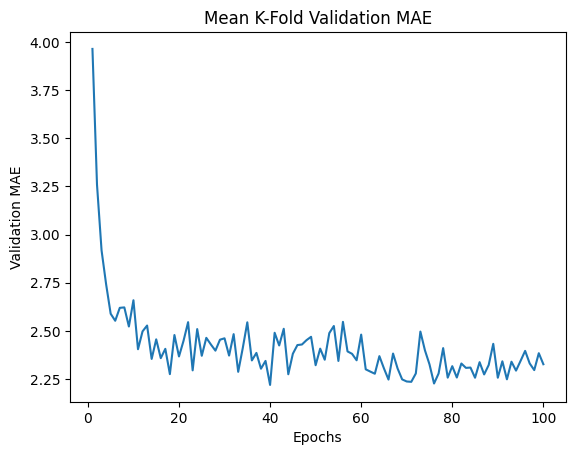

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Mean K-Fold Validation MAE')
plt.show()